In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter('ignore')

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
df = pd.read_csv('cumulative.csv')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 9564 rows and 50 columns


In [4]:
df.head(5)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


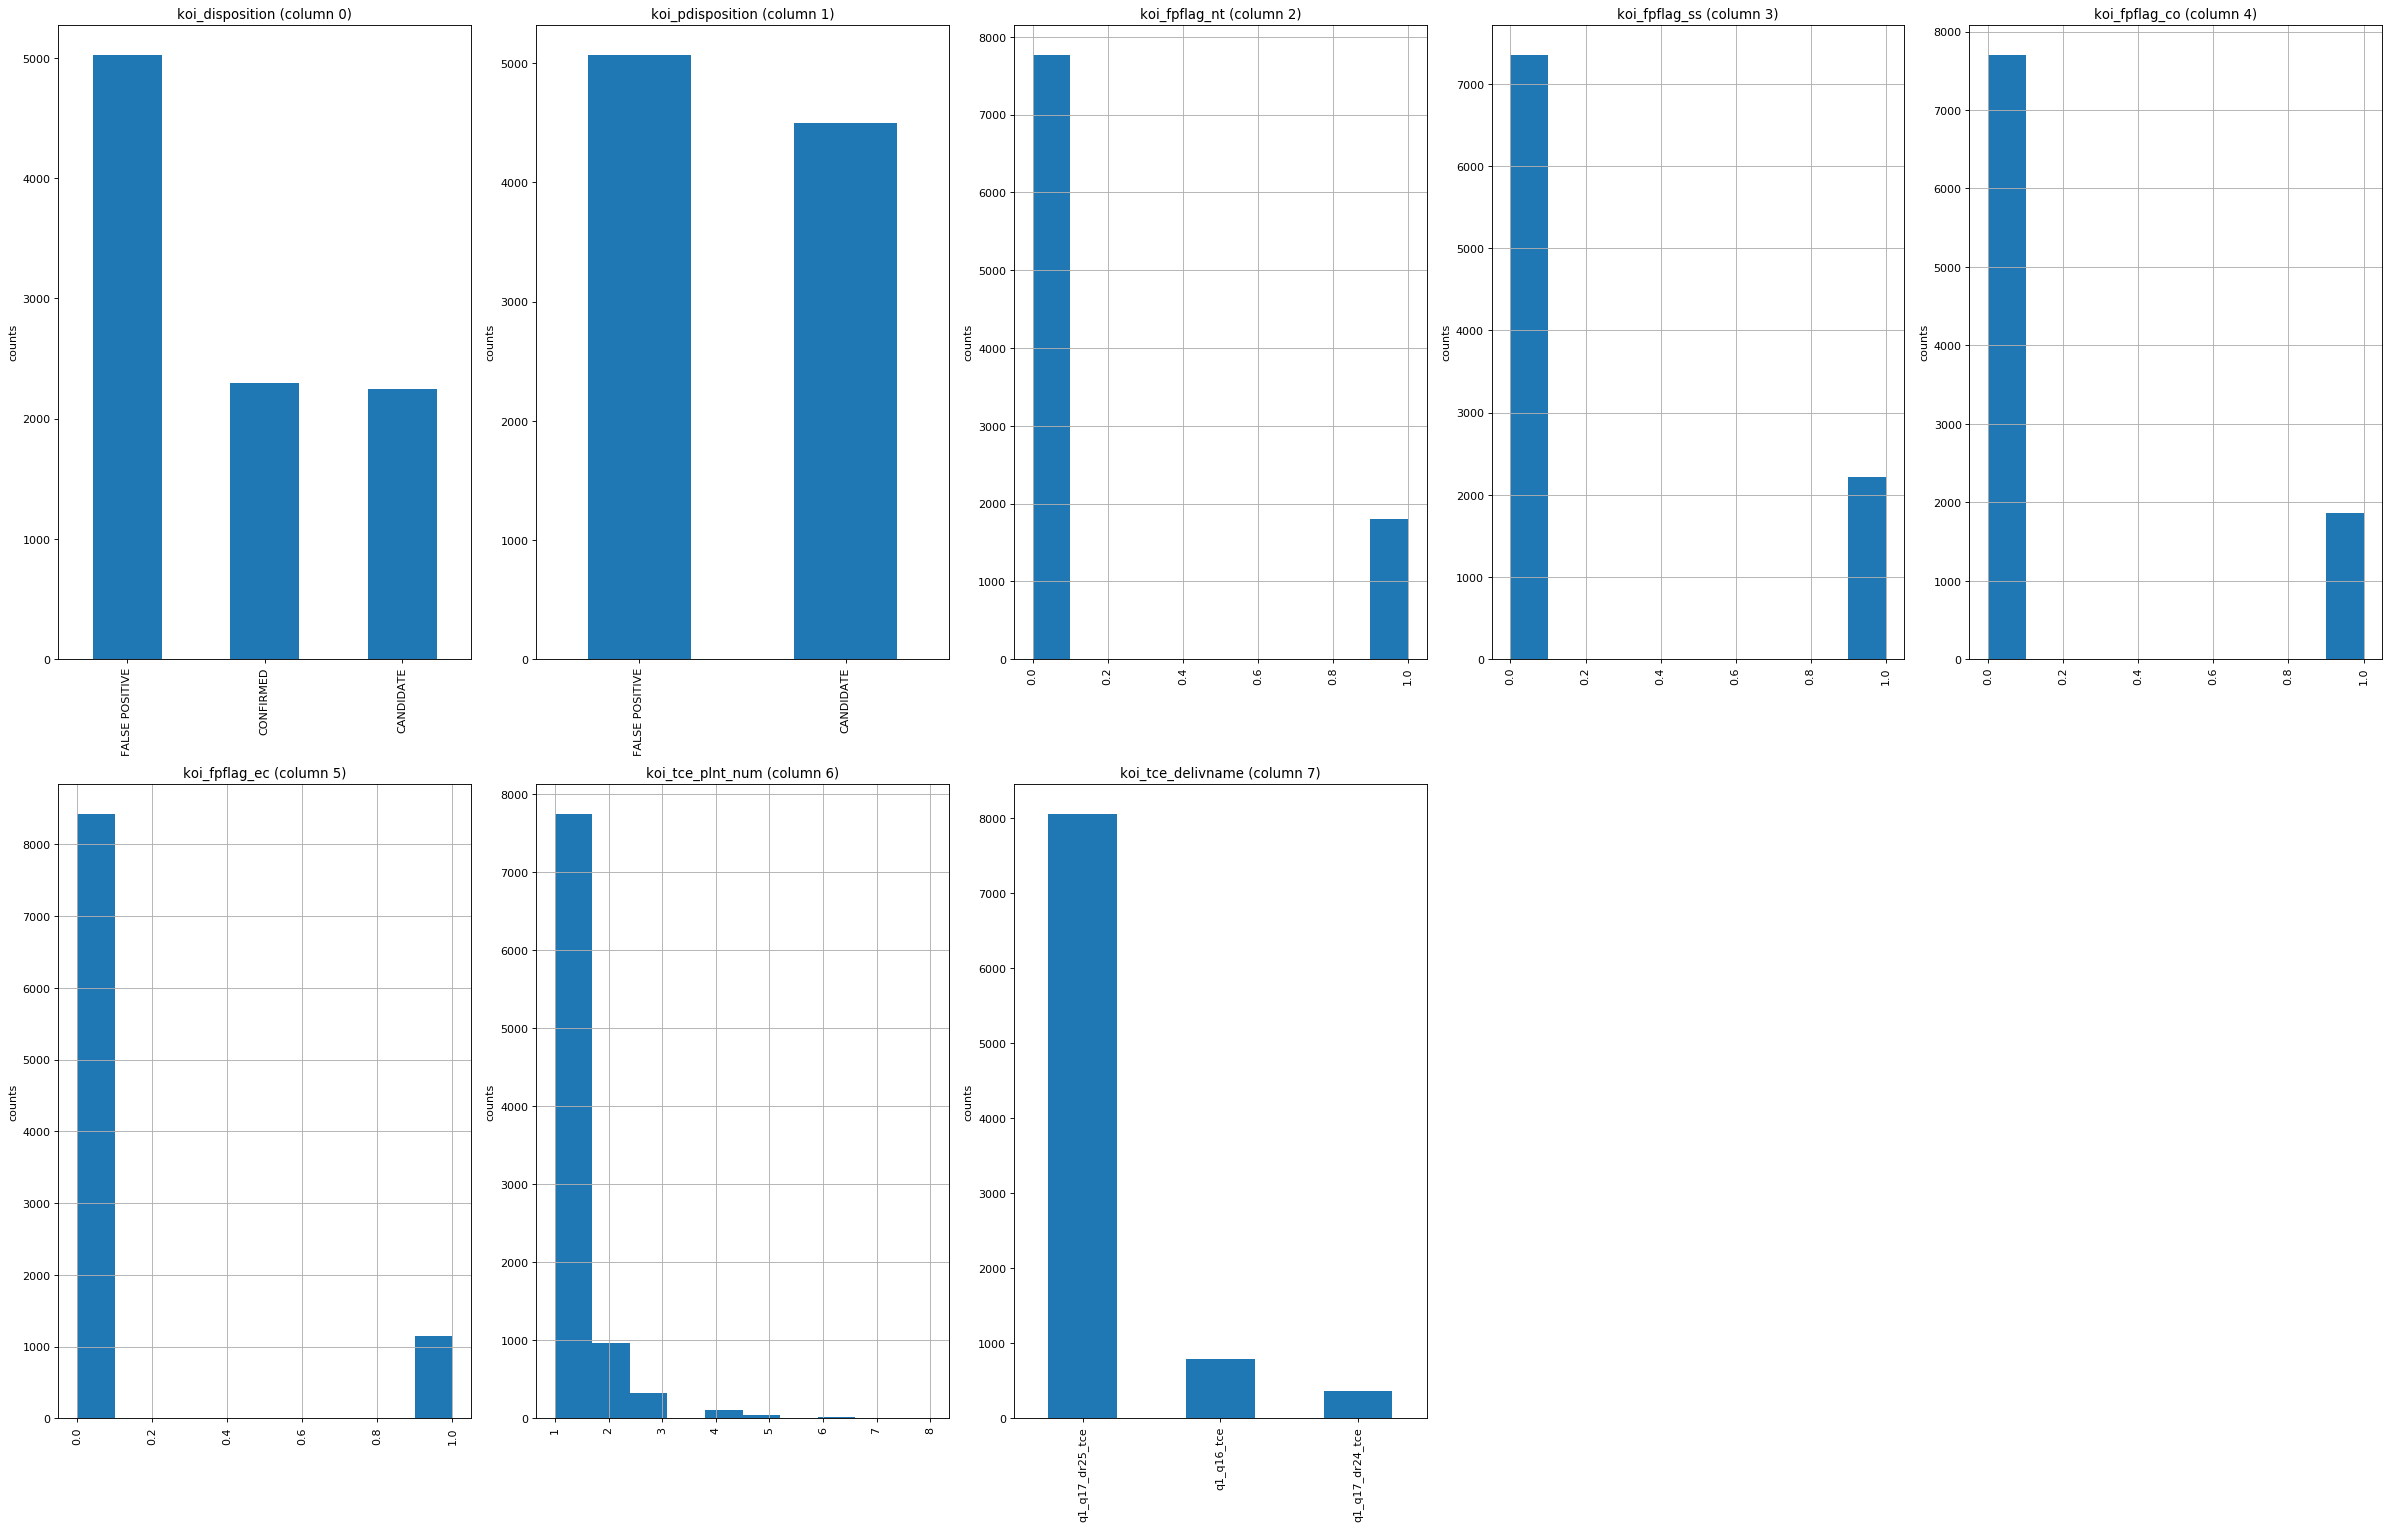

In [5]:
plotPerColumnDistribution(df, 10, 5)

In [6]:
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [7]:
# Set features. This will also be used as your x values.
# Selected the columns which have importances > 0.02 
selected_features = df[[
    'koi_period',
    'koi_time0bk',
    'koi_impact',
    'koi_duration',
    'koi_depth',    
    'koi_prad',
    'koi_model_snr',
    'koi_teq',    
]]
selected_features.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_model_snr,koi_teq
0,9.488036,170.53875,0.146,2.9575,615.8,2.26,35.8,793.0
1,54.418383,162.51384,0.586,4.5070,874.8,2.83,25.8,443.0
4,2.525592,171.59555,0.701,1.6545,603.3,2.75,40.9,1406.0
5,11.094321,171.20116,0.538,4.5945,1517.5,3.90,66.5,835.0
6,4.134435,172.97937,0.762,3.1402,686.0,2.77,40.2,1160.0


In [8]:
selected_features.describe()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_model_snr,koi_teq
count,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000
mean,26.628847,157.083979,0.425523,4.306872,1143.277743,2.883178,88.373601,840.535478
std,51.383181,42.008697,0.332442,2.712920,2689.784178,3.395177,285.526755,386.863476
min,0.341842,120.565925,0.000000,0.427900,24.300000,0.490000,6.000000,129.000000
25%,5.035057,134.183970,0.080000,2.513700,218.400000,1.530000,20.200000,554.000000
50%,11.189571,140.426540,0.390000,3.579100,460.500000,2.170000,31.500000,782.000000
75%,25.433786,171.278070,0.746000,5.309100,898.300000,2.940000,54.700000,1040.000000
max,1071.232624,589.719750,1.300000,24.420000,36912.000000,77.760000,5945.900000,3559.000000


In [9]:
X = selected_features
y = df["koi_pdisposition"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
X_train.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_model_snr,koi_teq
5356,219.321556,320.728620,0.244,12.4124,3628.7,6.11,93.8,313.0
1851,4.893365,133.644900,0.218,3.4850,138.3,1.60,15.9,1374.0
2202,13.712185,135.518750,0.680,2.4370,786.7,2.47,22.6,676.0
2949,4.454194,172.820223,0.479,2.3061,16042.0,11.76,1022.2,1017.0
771,5.968724,137.158607,0.166,3.6510,510.6,3.26,107.1,1251.0


In [12]:
from collections import Counter
Counter(y_train)


Counter({'CANDIDATE': 1668, 'FALSE POSITIVE': 33})

In [13]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
X_train_scaled = MinMaxScaler().fit(X_train)
X_test_scaled = X_train_scaled.transform(X_test)
X_train_scaled = X_train_scaled.transform(X_train)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
knn_acc = knn.score(X_test_scaled, y_test)

In [16]:
print(f"Accuracy = {knn_acc}")
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Accuracy = 0.9788732394366197
Training Data Score: 0.9805996472663139
Testing Data Score: 0.9788732394366197


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
param_grid_3 = {"n_neighbors": [5, 10, 20] }
knn_grid_model= GridSearchCV(knn, param_grid_3)

In [18]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 10, 20]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [19]:
print(knn_grid_model.best_score_)
print(knn_grid_model.best_params_)

0.9805996472663139
{'n_neighbors': 5}


In [20]:
knn_grid_acc = knn_grid_model.score(X_test_scaled, y_test)

In [21]:
print(f"Accuracy = {knn_grid_acc}")
print(f"Training Data Score: {knn_grid_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn_grid_model.score(X_test_scaled, y_test)}")

Accuracy = 0.9788732394366197
Training Data Score: 0.9805996472663139
Testing Data Score: 0.9788732394366197


k: 1, Train/Test Score: 1.000/0.968
k: 3, Train/Test Score: 0.982/0.981
k: 5, Train/Test Score: 0.981/0.979
k: 7, Train/Test Score: 0.981/0.979
k: 9, Train/Test Score: 0.981/0.979
k: 11, Train/Test Score: 0.981/0.979
k: 13, Train/Test Score: 0.981/0.979
k: 15, Train/Test Score: 0.981/0.979
k: 17, Train/Test Score: 0.981/0.979
k: 19, Train/Test Score: 0.981/0.979


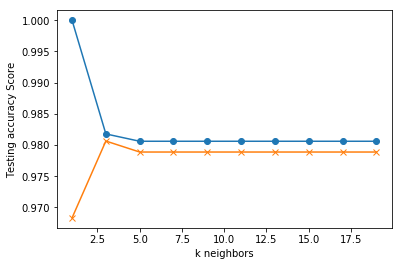

In [22]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn_grid_model = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=k)) #StandardScaler
    knn_grid_model.fit(X_train, y_train)
    train_score = knn_grid_model.score(X_train, y_train)
    test_score = knn_grid_model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(knn.predict(X_test_scaled), y_test))

                precision    recall  f1-score   support

     CANDIDATE       1.00      0.98      0.99       568
FALSE POSITIVE       0.00      0.00      0.00         0

     micro avg       0.98      0.98      0.98       568
     macro avg       0.50      0.49      0.49       568
  weighted avg       1.00      0.98      0.99       568



In [24]:
print(classification_report(knn_grid_model.predict(X_test_scaled), y_test))

                precision    recall  f1-score   support

     CANDIDATE       1.00      0.98      0.99       568
FALSE POSITIVE       0.00      0.00      0.00         0

     micro avg       0.98      0.98      0.98       568
     macro avg       0.50      0.49      0.49       568
  weighted avg       1.00      0.98      0.99       568



In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

clf = RandomForestClassifier(n_estimators=80)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)

print("Accuracy:" ,acc)
print( "Confusion Matrix")
print( confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(clf.feature_importances_)

Accuracy: 0.9788732394366197
Confusion Matrix
[[556   0]
 [ 12   0]]
                precision    recall  f1-score   support

     CANDIDATE       0.98      1.00      0.99       556
FALSE POSITIVE       0.00      0.00      0.00        12

     micro avg       0.98      0.98      0.98       568
     macro avg       0.49      0.50      0.49       568
  weighted avg       0.96      0.98      0.97       568

[0.16127376 0.11564473 0.10299665 0.15233536 0.10951823 0.1273319
 0.10003945 0.13085991]


## Looking at the feature importances or weights it looks like koi_period is the has the highest importance.
## Second is koi_duration, let's take these two variables and do some multiple linear regression predictions.

In [26]:
from sklearn import linear_model

X = df[['koi_period', 'koi_duration']]
y = df['koi_score']

In [27]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:

predicted_score = regr.predict([[35.5, 3.5]])

print(predicted_score)

[0.95944648]


In [29]:
X = df[['koi_time0bk', 'koi_depth']]
y = df['koi_score']

In [30]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
predicted_score = regr.predict([[35.5, 3.5]])

print(predicted_score)

[0.98930753]


In [32]:
X = df[['koi_impact', 'koi_prad']]
y = df['koi_score']

In [33]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
predicted_score = regr.predict([[35.5, 3.5]])

print(predicted_score)

[0.76071014]


In [41]:
X = df[['koi_model_snr', 'koi_teq']]
y = df['koi_score']

In [42]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
predicted_score = regr.predict([[35.5, 3.5]])

print(predicted_score)

[0.95181391]
